
# Project: TMDb Movies Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This project revolves around the analysis of tmdb movies dataset.There could be many characteristics that affect or influence the quality of a movie.
The main attributes of this dataset are budget,revenue, title,cast etc.

#### Questions that can formulated and answered by analysing this dataset are:
<ul>
<li><a href = "#q1"> what are the most popular genres year by year?</a></li>
<li><a href = "#q2"> what were the most popular genres in 2000 compared to 2015?</a></li>
<li><a href = "#q3"> Do movies with higher vote count recieved better ratings? </a></li>
<li><a href = "#q4"> what is the highest budget movie?</a></li>
<li><a href = "#q5"> what is the least budget movie?</a></li>
<li><a href = "#q6"> which movie had the highest profit?</a></li>
<li><a href = "#q7"> which director directed most films?</a></li>
<li><a href = "#q8"> what is the average runtime of all movies?</a></li>
<li><a href = "#q9"> which cast has appeared the most?</a></li>
</ul>

In [364]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [365]:
# load the data
df = pd.read_csv('datasets/tmdb_movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [366]:
df.shape

(10866, 21)

The dataset consists of 10866 records and 21 columns or attributes

In [367]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [368]:
# lets check the datatypes assosciated with each attribute in the dataset
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

### Removing columns which doesnt help in our analysis

The columns that can be removed or dropped from the dataset are:
- imdb_id
- homepage
- budget_adj
- revenue_adj
- release_date
- overview
- tagline
- keywords
- production_companies

In [369]:
drop_columns = ['imdb_id','homepage','budget_adj','revenue_adj','release_date','overview','tagline','keywords','production_companies']
df = df.drop(drop_columns,axis=1)

In [370]:
df.shape

(10866, 12)

we can see that the above mentioned columns are dropped from the data frame.

In [371]:
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2947,7.3,2015


In [372]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
id                10866 non-null int64
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
cast              10790 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
dtypes: float64(2), int64(6), object(4)
memory usage: 1018.8+ KB


In [373]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


In [374]:
# To check how many null values are there in each column in the dataset
df.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
vote_count         0
vote_average       0
release_year       0
dtype: int64


### Data Cleaning 

we can see that the cast and genre columns contain many names or inputs and are seperated by "|" . Hence we have to split the cast and genres columns into multiple cast and genres columns. Before splitting the data we have to make sure there are no null values. 

In [375]:
# lets check for null values in cast column
df['cast'].isnull().sum()

76

In [376]:
df = df[df['cast'].notnull()]
df.shape

(10790, 12)

The data records which have null values for cast are dropped from the dataframe. Similarly lets check for the genres attribute

In [377]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10790 entries, 0 to 10865
Data columns (total 12 columns):
id                10790 non-null int64
popularity        10790 non-null float64
budget            10790 non-null int64
revenue           10790 non-null int64
original_title    10790 non-null object
cast              10790 non-null object
director          10752 non-null object
runtime           10790 non-null int64
genres            10768 non-null object
vote_count        10790 non-null int64
vote_average      10790 non-null float64
release_year      10790 non-null int64
dtypes: float64(2), int64(6), object(4)
memory usage: 1.1+ MB


In [378]:
df['genres'].isnull().sum()

22

In [379]:
# lets divide the cast and genres columns into multiple columns.
# seperating columns with multiple values in it. also can be referred as division of multivalued attribute 
# into multiple single valued attributes.
split_cast = df['cast'].str.split("|",expand=True).rename(columns = lambda x: f"cast_{x+1}")
split_cast.head()

,cast_1,cast_2,cast_3,cast_4,cast_5
0,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson
1,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman
2,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller
3,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley
4,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson


In [380]:
# similarly lets divide genres column into multiple columns
split_genres = df['genres'].str.split("|",expand=True).rename(columns = lambda x: f"genre_{x+1}")
split_genres.head()

,genre_1,genre_2,genre_3,genre_4,genre_5
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None


In [381]:
#join the above dataframes into the dataset and drop cast and genres columns.
df = df.join([split_cast,split_genres])
df = df.drop(['cast','genres'],axis=1)
df.head()

,id,popularity,budget,revenue,original_title,director,runtime,vote_count,vote_average,release_year,cast_1,cast_2,cast_3,cast_4,cast_5,genre_1,genre_2,genre_3,genre_4,genre_5
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,5562,6.5,2015,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson,Action,Adventure,Science Fiction,Thriller,None
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,6185,7.1,2015,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman,Action,Adventure,Science Fiction,Thriller,None
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,2480,6.3,2015,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller,Adventure,Science Fiction,Thriller,None,None
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,5292,7.5,2015,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley,Action,Adventure,Science Fiction,Fantasy,None
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,2947,7.3,2015,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson,Action,Crime,Thriller,None,None


In [382]:
df.shape

(10790, 20)

> **The next problem which we have is there are some records which have 0 in budget,revenue and runtime. so lets replace those values with `np.NaN`(null values) and then drop those records from data frame using `dropna()` method**

In [383]:
# creating a list of columns which have 0 values in it.
cols = ['budget','revenue','runtime']

#replacing the 0 values with np.NaN (null values)
df[cols] = df[cols].replace(0,np.NaN)

#dropping the corresponding records which have null(NaN) in the corresponding columns(cols)
df.dropna(subset=cols,inplace=True)
df.shape

(3851, 20)

<a id='eda'></a>
# Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.
<a id='q1'></a>
## Q1: What are the most popular genres year by year?

In [384]:
# locate the required data columns and mask into genre_data
genre_data = df.loc[:,['release_year','genre_1','genre_2','genre_3','genre_4','genre_5']]
genre_data

,release_year,genre_1,genre_2,genre_3,genre_4,genre_5
0,2015,Action,Adventure,Science Fiction,Thriller,None
1,2015,Action,Adventure,Science Fiction,Thriller,None
2,2015,Adventure,Science Fiction,Thriller,None,None
3,2015,Action,Adventure,Science Fiction,Fantasy,None
4,2015,Action,Crime,Thriller,None,None
5,2015,Western,Drama,Adventure,Thriller,None
6,2015,Science Fiction,Action,Thriller,Adventure,None
7,2015,Drama,Adventure,Science Fiction,None,None
8,2015,Family,Animation,Adventure,Comedy,None
9,2015,Comedy,Animation,Family,None,None


In [385]:
genre_data.dtypes

release_year     int64
genre_1         object
genre_2         object
genre_3         object
genre_4         object
genre_5         object
dtype: object

In [386]:
years = genre_data['release_year'].unique()
years

array([2015, 2014, 1977, 2009, 2010, 1999, 2001, 2008, 2011, 2002, 1994,
       2012, 2003, 1997, 2013, 1985, 2005, 2006, 2004, 1972, 1980, 2007,
       1979, 1984, 1983, 1995, 1992, 1981, 1996, 2000, 1982, 1998, 1989,
       1991, 1988, 1987, 1968, 1974, 1975, 1962, 1964, 1971, 1990, 1961,
       1960, 1976, 1993, 1967, 1963, 1986, 1973, 1970, 1965, 1969, 1978,
       1966])

In [387]:
genre_year = genre_data[genre_data['release_year']== 2015]
genre_year = genre_year.drop('release_year',axis=1)
count = genre_year.stack().value_counts()
(count)

Drama              81
Comedy             52
Thriller           47
Action             37
Adventure          34
Crime              24
Science Fiction    22
Romance            18
Horror             17
Mystery            13
Fantasy            13
Family             13
Music               9
Animation           9
War                 5
History             5
Western             2
dtype: int64

In [388]:
count = count.value_counts().idxmax()
count

13

The above code has been understood and referred from https://stackoverflow.com/questions/48590268/pandas-get-the-most-frequent-values-of-a-column and http://www.datasciencemadesimple.com/reshape-using-stack-unstack-function-pandas-python/

we can see that the dataframe genre_year has data specific to year 2015 and when we stack the genre_year data frame we get a pandas series object on which we can perform value_counts to find the number of occurences of each genre and get the most frequent value of the column.(Note: there is only one column now because the dataframe has been stacked)

In [389]:
# now lets apply the above code to all columns to get the most popular genre year by year.
genre = []
for year in years:
    # creating a mask for that specific year 
    genre_year = genre_data[genre_data['release_year'] == year]
    # drop the year column from the dataframe to stack the data 
    genre_year = genre_year.drop('release_year',axis=1)
    #stack the data and find the maximum occurence value of genre
    popular_genre = genre_year.stack().value_counts().idxmax()
    genre.append((year,popular_genre))

# This list contains the data of most produced genre year wise
genre    

[(2015, 'Drama'),
 (2014, 'Drama'),
 (1977, 'Drama'),
 (2009, 'Drama'),
 (2010, 'Drama'),
 (1999, 'Comedy'),
 (2001, 'Comedy'),
 (2008, 'Drama'),
 (2011, 'Drama'),
 (2002, 'Drama'),
 (1994, 'Comedy'),
 (2012, 'Drama'),
 (2003, 'Comedy'),
 (1997, 'Thriller'),
 (2013, 'Drama'),
 (1985, 'Comedy'),
 (2005, 'Drama'),
 (2006, 'Drama'),
 (2004, 'Drama'),
 (1972, 'Thriller'),
 (1980, 'Drama'),
 (2007, 'Drama'),
 (1979, 'Drama'),
 (1984, 'Comedy'),
 (1983, 'Thriller'),
 (1995, 'Drama'),
 (1992, 'Drama'),
 (1981, 'Thriller'),
 (1996, 'Drama'),
 (2000, 'Drama'),
 (1982, 'Drama'),
 (1998, 'Drama'),
 (1989, 'Comedy'),
 (1991, 'Comedy'),
 (1988, 'Comedy'),
 (1987, 'Comedy'),
 (1968, 'Drama'),
 (1974, 'Drama'),
 (1975, 'Drama'),
 (1962, 'Drama'),
 (1964, 'Drama'),
 (1971, 'Thriller'),
 (1990, 'Drama'),
 (1961, 'Drama'),
 (1960, 'Drama'),
 (1976, 'Drama'),
 (1993, 'Drama'),
 (1967, 'Drama'),
 (1963, 'Thriller'),
 (1986, 'Drama'),
 (1973, 'Drama'),
 (1970, 'Drama'),
 (1965, 'Drama'),
 (1969, 'Adventure

In [390]:
# lets convert the above list into a dataframe for better visualisation of data 
popular_genre_year = pd.DataFrame(genre,columns=['year','popular genre'])
popular_genre_year.sort_values(by = ['year'],inplace=True,ascending=False)
popular_genre_year = popular_genre_year.reset_index()
popular_genre_year = popular_genre_year.drop(['index'],axis=1)
popular_genre_year

# the above code can also be written as
# popular_genre_year = pd.DataFrame(genre,columns=['year','popular genre']).sort_values(by=['year'],inplace=True)
# popular_genre_year = popular_genre_year.reset_index().drop([index],axis=1)


,year,popular genre
0,2015,Drama
1,2014,Drama
2,2013,Drama
3,2012,Drama
4,2011,Drama
5,2010,Drama
6,2009,Drama
7,2008,Drama
8,2007,Drama
9,2006,Drama


The above represnted dataframe shows the most frequent or popular genres produced year by year.

<a id='q2'></a>
## Q2:  What were the most popular genres produced in 2000 when compared to 2015?

In [391]:
# creating a mask for the genres of movies in the year 2015
genres_2015 = genre_data.query('release_year == 2015')

#drop the release year column to stack the genres and find the value count of each genre
genres_2015.drop('release_year',inplace=True,axis=1)
genres_2015 = genres_2015.stack().value_counts()
genres_2015

/home/bikumalla/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Drama              81
Comedy             52
Thriller           47
Action             37
Adventure          34
Crime              24
Science Fiction    22
Romance            18
Horror             17
Mystery            13
Fantasy            13
Family             13
Music               9
Animation           9
War                 5
History             5
Western             2
dtype: int64

In [392]:
# lets perform the same operations on year 2000 as done above for 2015
genres_2000 = genre_data.query('release_year == 2000')
genres_2000.drop('release_year',inplace=True,axis=1)
genres_2000 = genres_2000.stack().value_counts()
genres_2000

Drama              45
Comedy             43
Thriller           32
Action             29
Adventure          19
Romance            17
Crime              17
Science Fiction    14
Family             12
Fantasy            10
Mystery             9
Horror              9
Animation           7
Music               5
War                 3
History             2
Western             1
Foreign             1
dtype: int64

now as we have the genres and their value counts(the number of movies produced of that genre in the specific year) we can analyse using bar plots.

now first lets fill the columns with 0 for those which are present in 2000 genres and not in 2015 genres and viceversa.
> we can observe that all the genres in 2000 are present in 2015 except the genre Foreign

In [393]:
# assign genre foreign with 0 in genres_2015
genres_2015['Foreign'] = 0
genres_2000 = genres_2000.sort_index()
genres_2015 = genres_2015.sort_index()

genres_2000

Action             29
Adventure          19
Animation           7
Comedy             43
Crime              17
Drama              45
Family             12
Fantasy            10
Foreign             1
History             2
Horror              9
Music               5
Mystery             9
Romance            17
Science Fiction    14
Thriller           32
War                 3
Western             1
dtype: int64

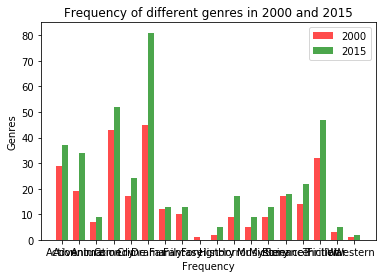

In [394]:
ind = np.arange(len(genres_2000))  # the x locations for the groups
width = 0.35       # the width of the bars

# plot bars
red_bars = plt.bar(ind, genres_2000, width, color='r', alpha=.7, label='2000')
green_bars = plt.bar(ind + width, genres_2015, width, color='g', alpha=.7, label='2015')

# title and labels
plt.ylabel('Genres')
plt.xlabel('Frequency')
plt.title('Frequency of different genres in 2000 and 2015')
locations = ind + width / 2  # xtick locations
labels = genres_2000.index.sort_values()  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend()

we can see that the plot is not clear hence adjust the figure size of the plot.

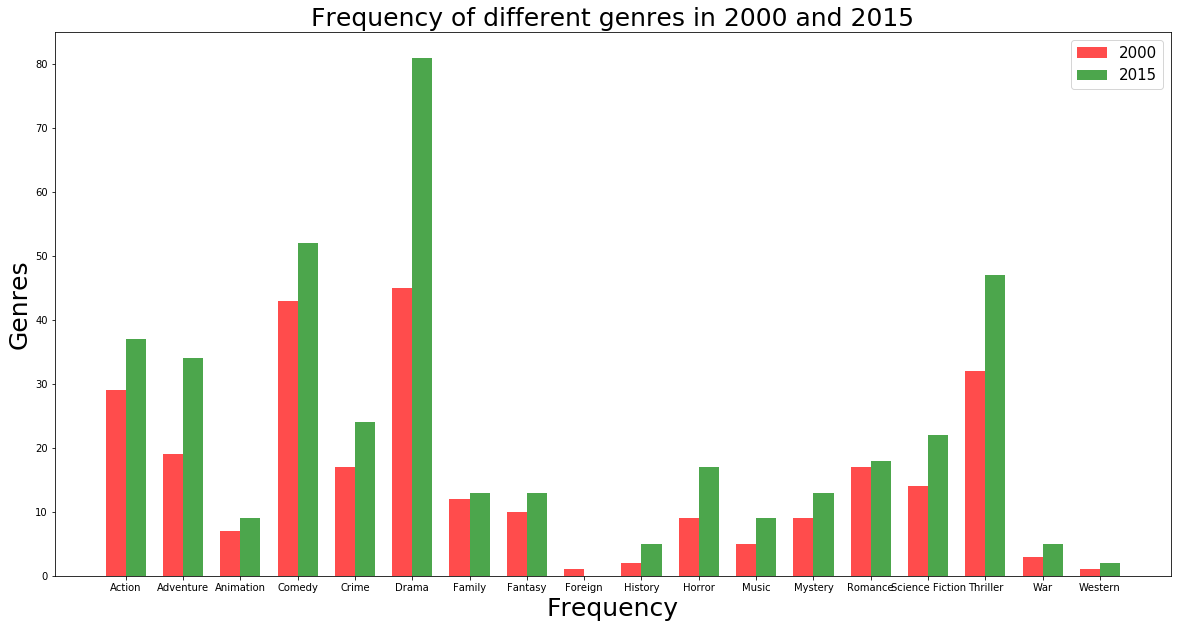

In [396]:
ind = np.arange(len(genres_2000))  # the x locations for the groups
width = 0.35       # the width of the bars

# plot bars
red_bars = plt.bar(ind, genres_2000, width, color='r', alpha=.7, label='2000')
green_bars = plt.bar(ind + width, genres_2015, width, color='g', alpha=.7, label='2015')

# title and labels
plt.ylabel('Genres',fontsize = 25)
plt.xlabel('Frequency',fontsize = 25)
plt.title('Frequency of different genres in 2000 and 2015',fontsize = 25)
locations = ind + width / 2  # xtick locations
labels = genres_2000.index.sort_values()  # xtick labels
plt.xticks(locations, labels,fontsize = 10)
plt.rcParams["figure.figsize"] = (20,10)
# legend
plt.legend(fontsize=15);

To understand and analyse the frequency of genres more accurately the bar plot can be plotted on proportions rather than on counts of the genres.

> Hence from graph it can be analysed that most popular genres produced in 2015 when compared to 2000 are `Drama` , `Thriller`,`comedy`and `horror`

<a id="q3"></a>
## Q3: Do Movies with higher vote count recieve better ratings?

In [397]:
df_ratings = df[['vote_count','vote_average']]
df_ratings.head()

,vote_count,vote_average
0,5562,6.5
1,6185,7.1
2,2480,6.3
3,5292,7.5
4,2947,7.3


In [398]:
df_ratings.shape

(3851, 2)

> The attribute vote_count tells us about the number of votes casted for that movie and the vote_average tells us information about average rating of the movie by the votes rated for it. Hence we need to find the relationship between these two.

In [399]:
df['vote_count'].describe()

count    3851.000000
mean      528.144118
std       880.170237
min        10.000000
25%        71.000000
50%       204.000000
75%       580.500000
max      9767.000000
Name: vote_count, dtype: float64

> It can be clearly understood that the minm votes casted for any movie are 10 and maximum votes casted for any movie are 9767. and the mean votes casted are 218. We have to analyse the movies with higher vote count. The higher vote count is relative to the number of votes casted on minm and maximum number. Hence lets consider the number of votes greater than the mean number of votes.(because mean votes are even greater than the 75 percentile of data)

In [400]:
df_ratings = df_ratings.query('vote_count > vote_count.mean()')
df_ratings.shape

(1036, 2)

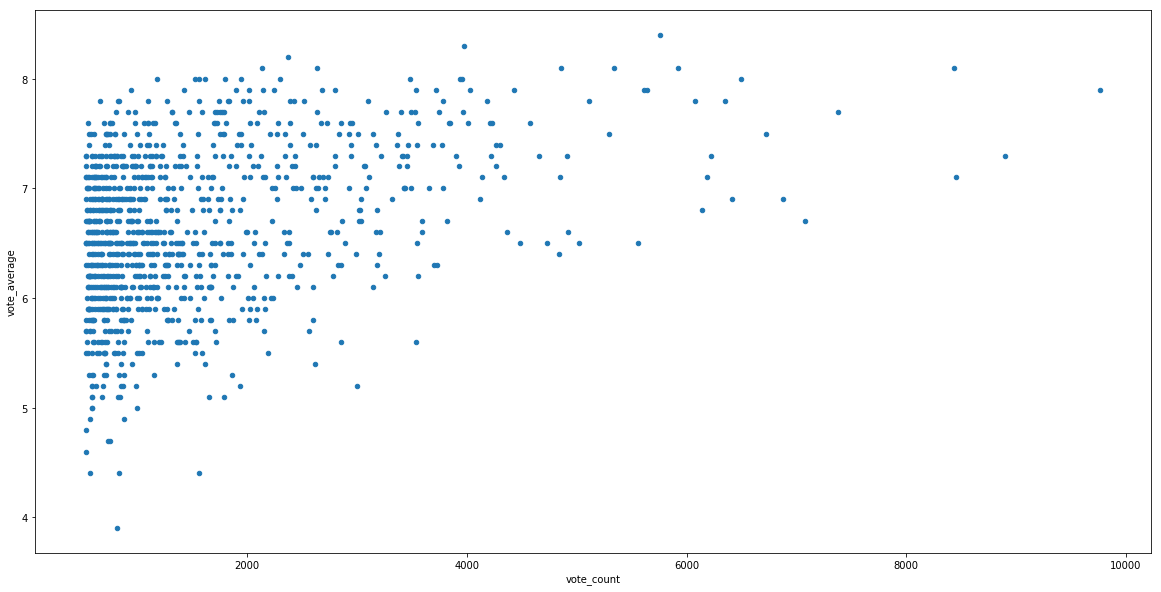

In [401]:
df_ratings.plot(x="vote_count",y="vote_average",kind="scatter");

In [402]:
df_ratings.corr()

,vote_count,vote_average
vote_count,1.000000,0.370166
vote_average,0.370166,1.000000


> we can see that the distribution is far more comforatble to analyse for number of votes greater than around 1500 to 2000. Hence let's take an arbitrary value in between, let it be 1800. Hence filter the data with votecounts greater than 1800 and draw a scatter plot.

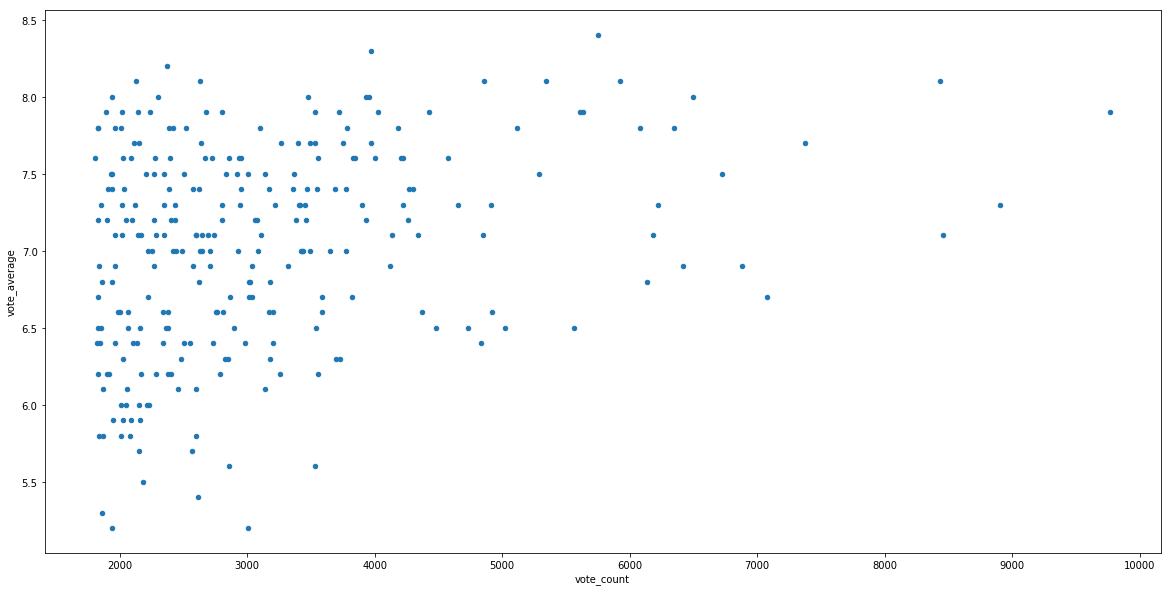

In [403]:
df_ratings = df_ratings.query('vote_count >= 1800')
df_ratings.plot(x="vote_count",y="vote_average",kind="scatter")

In [404]:
df_ratings.corr()

,vote_count,vote_average
vote_count,1.000000,0.297309
vote_average,0.297309,1.000000


> From above two graphs it is convinced that the vote_count and ratings for higher amount of votes fall under positive correlation. Hence it may be said that movies with higher votecount recieved better ratings.

<a id='q4'></a>
## Q4: What is the highest budget movie?

> To find the highest budget movie, lets find the maximum value of budget in the budget column of dataframe and then map that value to the dataframe and find the record which has that budget value

In [405]:
highest_budget = df['budget'].max()
highest_budget

425000000.0

In [406]:
highest_budget_movie = df[df['budget']== highest_budget]
highest_budget_movie

,id,popularity,budget,revenue,original_title,director,runtime,vote_count,vote_average,release_year,cast_1,cast_2,cast_3,cast_4,cast_5,genre_1,genre_2,genre_3,genre_4,genre_5
2244,46528,0.25054,425000000.0,11087569.0,The Warrior's Way,Sngmoo Lee,100.0,74,6.4,2010,Kate Bosworth,Jang Dong-gun,Geoffrey Rush,Danny Huston,Ti Lung,Adventure,Fantasy,Action,Western,Thriller


We can even analyse this information using idxmax() method of pandas and it can be done as follows.

In [407]:
high_movie = df['budget'].idxmax()
df.loc[high_movie]

id                            46528
popularity                  0.25054
budget                     4.25e+08
revenue                 1.10876e+07
original_title    The Warrior's Way
director                 Sngmoo Lee
runtime                         100
vote_count                       74
vote_average                    6.4
release_year                   2010
cast_1                Kate Bosworth
cast_2                Jang Dong-gun
cast_3                Geoffrey Rush
cast_4                 Danny Huston
cast_5                      Ti Lung
genre_1                   Adventure
genre_2                     Fantasy
genre_3                      Action
genre_4                     Western
genre_5                    Thriller
Name: 2244, dtype: object

<a id='q5'></a>
## Q5: what is the least budget movie?

lets follow the same steps which we have taken to find the maximum budget but here we have to find the minm among the budget values.

In [408]:
lowest_budget = df['budget'].min()
lowest_budget

1.0

In [409]:
lowest = df[df['budget']==lowest_budget]
lowest

,id,popularity,budget,revenue,original_title,director,runtime,vote_count,vote_average,release_year,cast_1,cast_2,cast_3,cast_4,cast_5,genre_1,genre_2,genre_3,genre_4,genre_5
2618,39964,0.090186,1.0,100.0,Lost & Found,Jeff Pollack,95.0,14,4.8,1999,David Spade,Sophie Marceau,Ever Carradine,Stephanie Chang,Neal MacMillan,Comedy,Romance,None,None,None
3581,59296,0.520430,1.0,1378.0,"Love, Wedding, Marriage",Dermot Mulroney,90.0,55,5.3,2011,Mandy Moore,Kellan Lutz,Jessica Szohr,Autumn Federici,James Brolin,Comedy,Romance,None,None,None


In [410]:
# the above tasks can also be done using pandas idxmin() method
low_movie = df['budget'].idxmin()
df.loc[low_movie]

id                          39964
popularity               0.090186
budget                          1
revenue                       100
original_title       Lost & Found
director             Jeff Pollack
runtime                        95
vote_count                     14
vote_average                  4.8
release_year                 1999
cast_1                David Spade
cast_2             Sophie Marceau
cast_3             Ever Carradine
cast_4            Stephanie Chang
cast_5             Neal MacMillan
genre_1                    Comedy
genre_2                   Romance
genre_3                      None
genre_4                      None
genre_5                      None
Name: 2618, dtype: object

But we can see that we have two movies Lost and found, Love wedding and marriage which have least budget which is 1. But if we use idxmin() we could only get lost and found because it cant return both index and hence goes in a lexicographic order to return the index of Lost and found

<a id='q6'></a>
## Q6: Which movie has the highest profit?

We should follow the same steps as those which have done for budget column, but instead find the maximum and minm of the profit column. But we dont have profit column, hence calculate the profit for each record and add profit column for the dataframe.

In [411]:
df.insert(4,"profit",df['revenue']-df['budget'])
df.head()

,id,popularity,budget,revenue,profit,original_title,director,runtime,vote_count,vote_average,...,cast_1,cast_2,cast_3,cast_4,cast_5,genre_1,genre_2,genre_3,genre_4,genre_5
0,135397,32.985763,150000000.0,1.513529e+09,1.363529e+09,Jurassic World,Colin Trevorrow,124.0,5562,6.5,...,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson,Action,Adventure,Science Fiction,Thriller,None
1,76341,28.419936,150000000.0,3.784364e+08,2.284364e+08,Mad Max: Fury Road,George Miller,120.0,6185,7.1,...,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman,Action,Adventure,Science Fiction,Thriller,None
2,262500,13.112507,110000000.0,2.952382e+08,1.852382e+08,Insurgent,Robert Schwentke,119.0,2480,6.3,...,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller,Adventure,Science Fiction,Thriller,None,None
3,140607,11.173104,200000000.0,2.068178e+09,1.868178e+09,Star Wars: The Force Awakens,J.J. Abrams,136.0,5292,7.5,...,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley,Action,Adventure,Science Fiction,Fantasy,None
4,168259,9.335014,190000000.0,1.506249e+09,1.316249e+09,Furious 7,James Wan,137.0,2947,7.3,...,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson,Action,Crime,Thriller,None,None


> we can see that to find the highest and lowest of any column we are writing the same block of code for different columns many times. Instead we could create a function to find the max and min of any column

In [420]:
def high_low(col):
    high = df[col].idxmax()
    high_df = pd.DataFrame(df.loc[high])
    
    low = df[col].idxmin()
    low_df = pd.DataFrame(df.loc[low])
    
    high_low = pd.concat([high_df,low_df],axis=1)
    return high_low


In [421]:
high_low('profit')

,1386,2244
id,19995,46528
popularity,9.43277,0.25054
budget,2.37e+08,4.25e+08
revenue,2.78151e+09,1.10876e+07
profit,2.54451e+09,-4.13912e+08
original_title,Avatar,The Warrior's Way
director,James Cameron,Sngmoo Lee
runtime,162,100
vote_count,8458,74
vote_average,7.1,6.4


We can analyse that Avatar movie is the movie with highest profit and sigmo lee's The warriors way is the least profit movie which has negative value which indicates that its not profit, its loss.

similarly we can even get the highest and lowest budget movie details.

In [423]:
high_low('budget')

,2244,2618
id,46528,39964
popularity,0.25054,0.090186
budget,4.25e+08,1
revenue,1.10876e+07,100
profit,-4.13912e+08,99
original_title,The Warrior's Way,Lost & Found
director,Sngmoo Lee,Jeff Pollack
runtime,100,95
vote_count,74,14
vote_average,6.4,4.8


<a id='q7'></a>
## Q7: which director directed most films?

This question can be answered by counting the number of occurences of each unique name in the director column and finding the name of director with maximum value count.

In [444]:
# find the value counts of director column
direction = df['director'].value_counts()
direction.head()
# we get each director and the number of films directed by them.

Steven Spielberg    27
Clint Eastwood      24
Ridley Scott        21
Woody Allen         18
Martin Scorsese     17
Name: director, dtype: int64

In [445]:
direction.idxmax()

'Steven Spielberg'

> Steven Spielberg is the director who has directed most number of films which are 27

<a id='q8'></a>
## Q8: what is the average runtime of all movie?

In [446]:
df['runtime'].mean()

109.22435730978967

hence the average run time of all movies is 109 min approx. Lets analyse the distribution of the run times of movies.

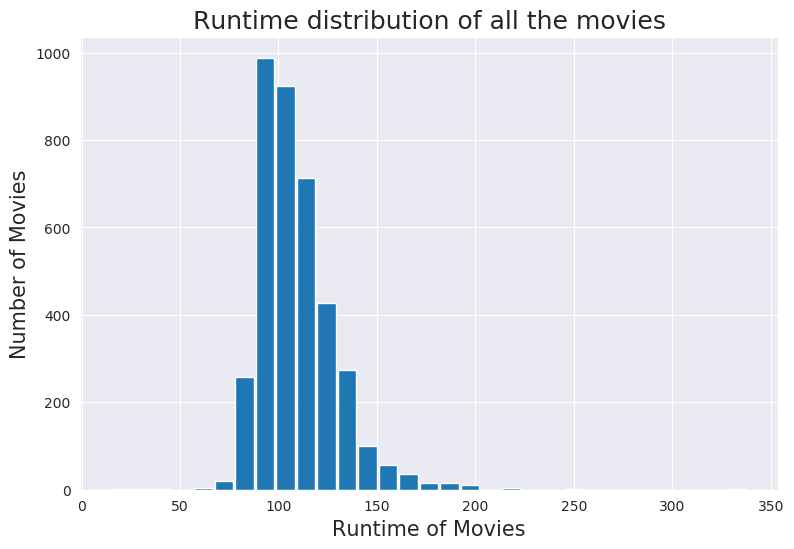

In [451]:
# lets plot a histogram of runtime of movies

sns.set_style('darkgrid')

plt.figure(figsize=(9,6), dpi = 100)
plt.xlabel('Runtime of Movies', fontsize = 15)
plt.ylabel('Number of Movies', fontsize=15)
plt.title('Runtime distribution of all the movies', fontsize=18)
plt.hist(df['runtime'], rwidth = 0.9, bins =31);

#displays the plot
plt.show()



We can see that most number of movies lie between the runtime of 90 to 125 min. 

<a id='q9'></a>
## Q9: Which cast has appeared the most?

This question can be analysed in the same manner "what is the most popular genre year by year?"

In [458]:
# mask the data selecting the columns cast_1 to cast_5
cast_data = df.loc[:,'cast_1':'cast_5']

# stack the dataframe and find the value counts of each cast
cast_most = cast_data.stack().value_counts()
cast_most.head()

Robert De Niro       52
Bruce Willis         46
Samuel L. Jackson    44
Nicolas Cage         43
Matt Damon           36
dtype: int64

In [465]:
# finding the most appeared cast using pandas idxmax() method
most_appeared = cast_most.idxmax()
most_appeared

'Robert De Niro'

In [466]:
cast_most.loc[most_appeared]

52

> Robert De Niro is the cast who has appeared for the highest times in movie which is 52 times.

<a id='conclusions'></a>
# Conclusions


In the beginning, I have loaded the dataset and had a look at all the attributes(columns) of the dataset and understood their meaning. Then I have analysed the dataset's general properties by looking at its shape, and the datatypes of each variable and the info of each variable. Then I have checked for Null data and I found that cast and genre attributes were multivalued attributes. 

Then I have cleaned the dataset by dropping(removing) the null values from the dataset. Next, I have split the columns cast and genre into multiple columns which are named as cast_1, cast_2 ... and genre_1, genre_2 ...

- My first research question was to **find the most popular produced genre year by year** and i have achieved it by performing several masks on the dataframe year wise and stacking the year wise data to find the value counts of each year and find the most occured genre in that respective year and continued this for all years.

- For the second research question, i had to find the counts of movies produced in each genre in years 2000 and 2015 and compare those years using a bar plot visualisation.

- For the third research question, i had to find the relationship between two attributes (number of votes casted and average vote rating) for each movie. I have achieved it by plotting a scatter plot between both the variables and analysed the correlation between the variables.

- For the fourth question, i had to find the highest budget movie, so i have performed the max() operation on the budget column and found the details of the movie with highest budget.

- For the fifth question, i had to find the minimum budget movie, so i have performed min() operation on the budget column and i have found the answer as 0 budget which is not correct. Then i have realised that i didn't clean the data properly. I have realise that dataanalysis process is a cyclic process which i learnt in one lecture of this course. So i went back and cleaned the data with 0's in it and found the minimum budget movie details. 

- For the sixth research question, i had to find the maximum profit movie and hence calculated the profit of each movie record and inserted a profit column into the dataset on which i performed max() operayion to find the maximum profit movie details.

> Then i have realised that to find max budget, max profit, max rating, max popularity and max votes casted etc and similarly minm of those columns, i had to write code again and again which is code redundnacy. Inorder to remove the code redundancy i have written a function which takes any column name and returns a dataframe consisting of maxm and minm details

- For the next reasearch questions, i had to apply the methods which were similar to those applied above to analyse the answer.

**All results are limited to the underlying data set and as no advaned statistics were performed, the results can only be treated as indicators and are not generalizable. Furthermore, one has to consider that many entries in the dataset have been removed due to missing data and data inconsistency**